#  Project "Launching an A/B test in the online store"
This is a project for the big online store. The goal of the progect is prioritize hypotheses, that were compiled with marketing department, launch an A/B test, and analyze the results of the test.

We have 3 datasets:

Hypotheses data - brief descriptions of the hypotheses and their metrics
Orders - file with all orders made deviding into 2 groups (A and B)
Visits - the number of visits on the date specified in the A/B test group 


In [1]:
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
!pip install -Uq plotly --user

In [3]:
!pip install -Uq matplotlib --user

In [4]:
!pip install -Uq seaborn --user

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats
import datetime as dt
import seaborn as sns
import math

In [6]:
try:
    hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
except IOError as e:
    print(e)
hypotheses.head(10)

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [7]:
try:
    orders= pd.read_csv('/datasets/orders_us.csv', sep=',')
except IOError as e:
    print(e)
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [8]:
try:
    visits=pd.read_csv('/datasets/visits_us.csv')
except IOError as e:
    print(e)
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [9]:
hypotheses = hypotheses.rename(columns=str.lower)
orders = orders.rename(columns=str.lower)
visits = visits.rename(columns=str.lower)

## STEP 1 

The file hypotheses contains nine hypotheses on boosting an online store's revenue with Reach, Impact, Confidence, and Effort specified for each. We need to apply the ICE and the RICE framework to prioritize hypotheses. 

In [10]:
hypotheses['ice'] = (hypotheses['impact'] * hypotheses['confidence'])/hypotheses['effort']   

hypotheses[['hypothesis','ice']].sort_values(by='ice', ascending=False)


,hypothesis,ice
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


#### Hypothesis 8, 0, 7, 6 are the most promissing by ICE, that means these hypotheses are having more impact and confidence and less efforts to achieve results.

In [11]:
hypotheses['rice'] = (hypotheses['reach'] * hypotheses['confidence']* hypotheses['impact'])/hypotheses['effort']   

print(hypotheses[['hypothesis','rice']].sort_values(by='rice', ascending=False))


                                          hypothesis   rice
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


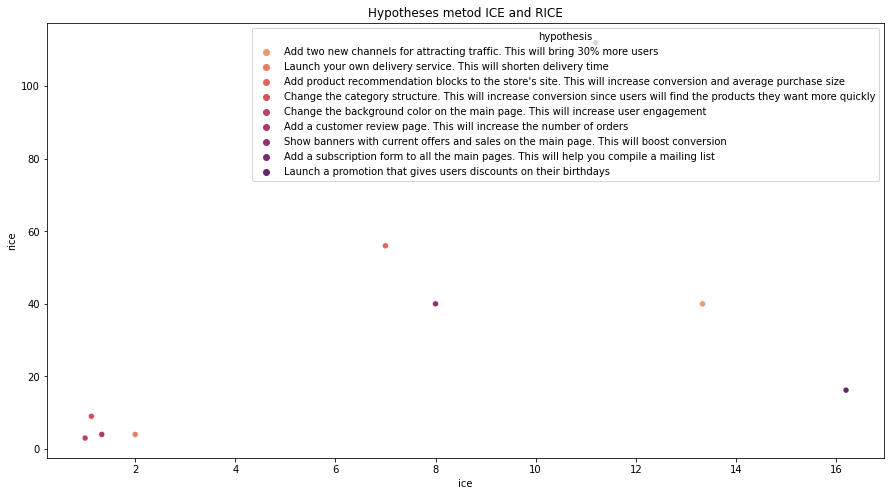

In [12]:
plt.figure(figsize=(15,8))
plt.title("Hypotheses metod ICE and RICE")
sns.scatterplot(data= hypotheses, x="ice", y="rice",palette="flare",hue="hypothesis")
plt.legend
plt.show();

#### Hypothesis 7,2,0,6 are leaders here by RICE method, the absolute leader is number 7, because it's reach paramether is 10 ( the biggest one), that means it'll impact very many clients of the company.

In consideration of 2 methods RICE and ICE we can define that the number 7 is more promissing and 0,6 are the next ones in this list of winners.

  ## STEP 2

Recentely our company carried out an A/B test and got the results described in the orders and visits files. It is time to analyse the results that we got.

In [13]:
orders['date']=pd.to_datetime(orders['date'])
orders.head()

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


In [15]:
orders.describe(include='all')

,transactionid,visitorid,date,revenue,group
count,1.197000e+03,1.197000e+03,1197,1197.000000,1197
unique,NaN,NaN,31,NaN,2
top,NaN,NaN,2019-08-05 00:00:00,NaN,B
freq,NaN,NaN,48,NaN,640
first,NaN,NaN,2019-08-01 00:00:00,NaN,NaN
last,NaN,NaN,2019-08-31 00:00:00,NaN,NaN
mean,2.155621e+09,2.165960e+09,NaN,131.491646,NaN
std,1.229085e+09,1.236014e+09,NaN,603.004729,NaN
min,1.062393e+06,5.114589e+06,NaN,5.000000,NaN
25%,1.166776e+09,1.111826e+09,NaN,20.800000,NaN


Let's check where there are users that are in both groups A and B and remove them from our data, as we can consider that users not elligable to take in account in the A/B test

In [16]:
group_counts=orders.groupby('visitorid').agg({'group':'nunique'})
to_include=group_counts[group_counts['group']==1]

In [17]:
orders_new=orders[orders['visitorid'].isin(to_include.index)]
orders_new.head()

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


In [18]:
orders_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1016 non-null   int64         
 1   visitorid      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   float64       
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 47.6+ KB


Now we have a data without questionable users. It is also needed to check if the division of users to 2 groups is almost equall.

In [19]:
orders_new.groupby("group")["visitorid"].count()

group
A    468
B    548
Name: visitorid, dtype: int64

###### We have 54% of users referred to group B and 46% of users in group A

In [20]:
visits['date']=pd.to_datetime(visits['date'],dayfirst=True)
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


### Graph cumulative revenue by group. Make conclusions and conjectures.

In [21]:
datesGroups = orders_new[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders_new[np.logical_and(orders_new['date'] <= x['date'], orders_new['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionid' : pd.Series.nunique, 'visitorid' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
 
visitorsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']


print(cumulativeData.head(10))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   2266.6       719
1 2019-08-01     B      17      17    967.2       713
2 2019-08-02     A      42      36   3734.9      1338
3 2019-08-02     B      40      39   3535.3      1294
4 2019-08-03     A      66      60   5550.1      1845
5 2019-08-03     B      54      53   4606.9      1803
6 2019-08-04     A      77      71   6225.6      2562
7 2019-08-04     B      68      66   6138.5      2573
8 2019-08-05     A      99      92   7623.6      3318
9 2019-08-05     B      89      87   7587.8      3280


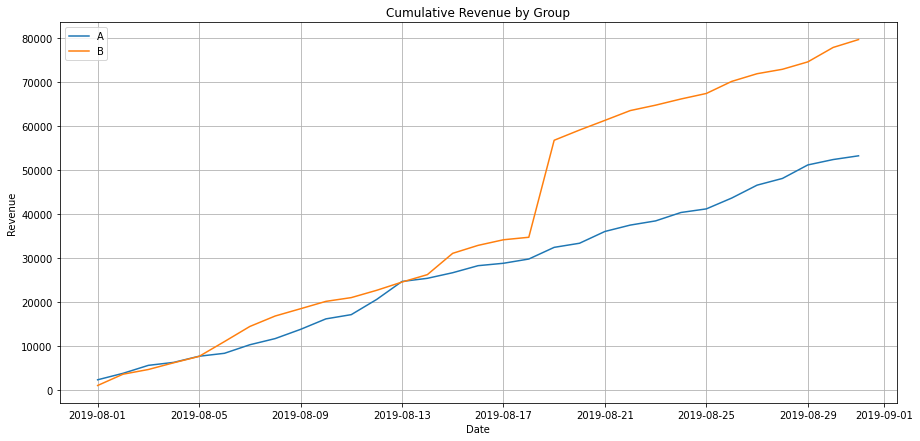

In [22]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
fig, ax = plt.subplots(figsize=(15,7))
plt.title("Cumulative Revenue by Group")
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.ylabel('Revenue')
plt.xlabel('Date')
plt.legend()
plt.grid()
plt.show();

Revenue is rising steadily throughout the whole test for both groups. Seems that for A the graph more flat. The B has peaks, maybe we have  the presence of outliers orders in the sample. 

### Graph cumulative average order size by group. Make conclusions and conjectures.

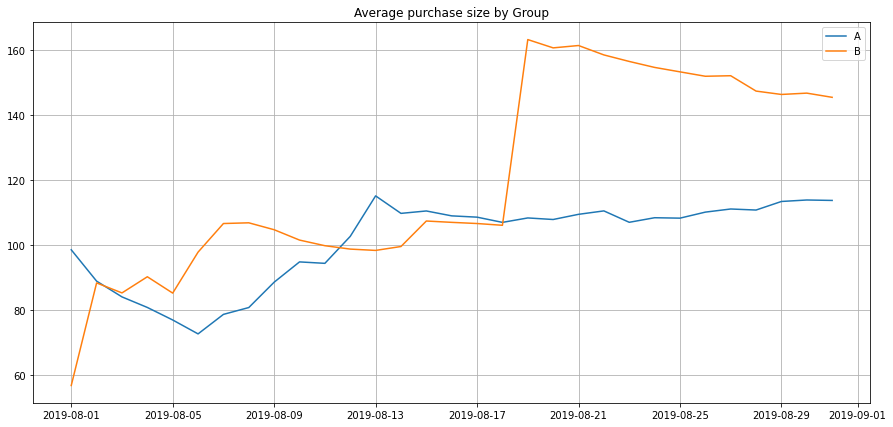

In [23]:
fig, ax = plt.subplots(figsize=(15,7))
plt.title("Average purchase size by Group")
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.grid()
plt.legend();

Average purchase size doesn't become steady by the end of the test: it stabilizes for group A and has a peak for group B and then falling again. The surge in group B in the last part half of the test may have been due to the presence of large, expensive orders. For the A group the average size of purchases remain the same at the end of the test.

### Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.

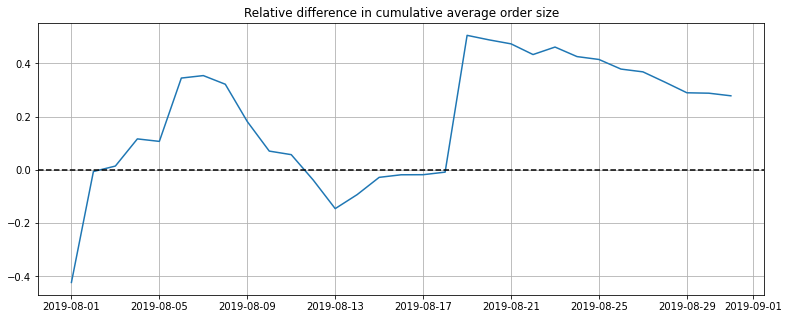

In [24]:
fig, ax = plt.subplots(figsize=(13,5))
plt.title("Relative difference in cumulative average order size")

mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.grid()
plt.axhline(y=0, color='black', linestyle='--');

The graph is not steady and at several points the difference between the segments spikes. This means there must be some big orders and outliers in the data.

### Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.

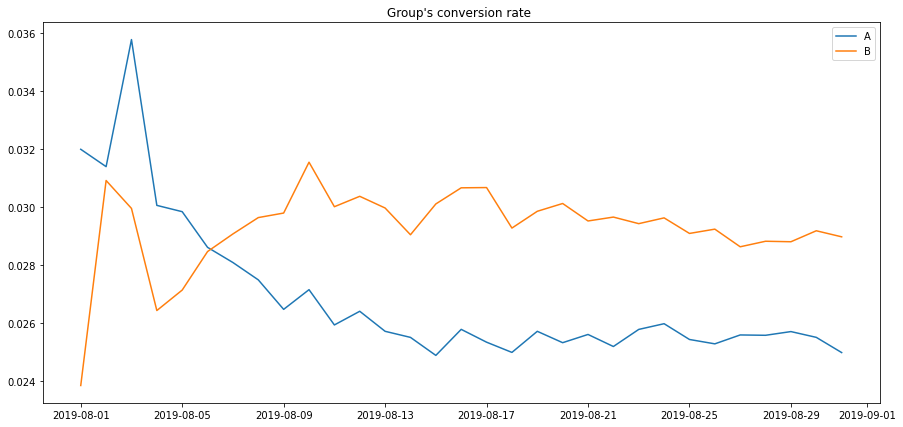

In [25]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

fig, ax = plt.subplots(figsize=(15,7))
plt.title("Group's conversion rate ")

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.show();

The convertion for B group is higher than for A group. It has a drop on 08.05 , but than a great rise and kept on the 0.34-0.35 point. As for group A, the situation is worse analysing the situation with conversion. We see the same trend of ups and downs for 2 groups in terms of conversion, but we have less buyers for the A group than for the B group

In [26]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

In [27]:
cumulativeDataA['conversion']=cumulativeDataA['orders']/cumulativeDataA['visitors']
cumulativeDataA['conversion'].median()

/tmp/ipykernel_141/2760587266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cumulativeDataA['conversion']=cumulativeDataA['orders']/cumulativeDataA['visitors']


0.025711882734590893

In [28]:
cumulativeDataB['conversion']=cumulativeDataB['orders']/cumulativeDataB['visitors']
cumulativeDataB['conversion'].median()

/tmp/ipykernel_141/1985249819.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cumulativeDataB['conversion']=cumulativeDataB['orders']/cumulativeDataB['visitors']


0.02951685567811092

The median conversion for B group is higher than for group A.

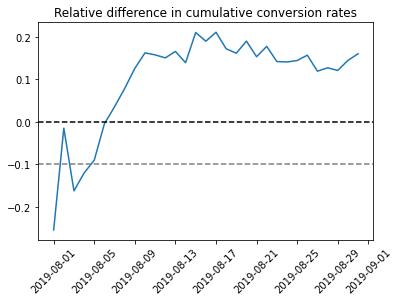

In [45]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.title("Relative difference in cumulative conversion rates")
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.xticks(rotation=45)
plt.show()

At the beginning of the test, group B was worse, but then it rised and took the lead. 
In general, the conversion ratio in the end looks more stable and the cumulative conversion rate for group B is higher.

### Scatter chart of the number of orders per user

         userId  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2


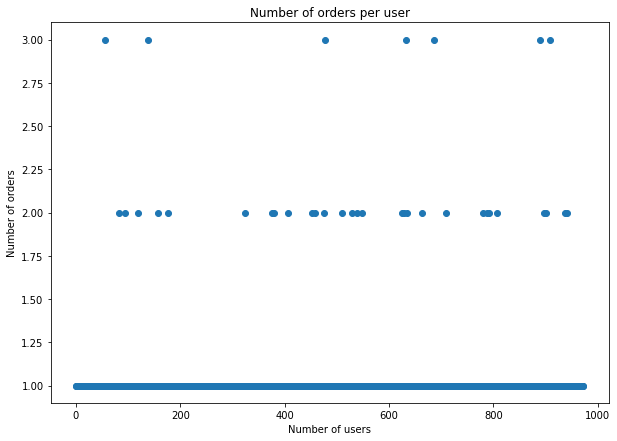

In [30]:
ordersByUsers = (
    orders_new.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)

ordersByUsers.columns = ['userId', 'orders']
print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))
x_values = pd.Series(range(0,len(ordersByUsers)))
fig, ax = plt.subplots(figsize=(10,7))
plt.title("Number of orders per user")
plt.ylabel('Number of orders')
plt.xlabel('Number of users')
plt.scatter(x_values, ordersByUsers['orders']);

If you look at this graph, you will notice that the mostly users have only 1 purchase, recently 2 purchases for 1 user, the 3 looks like the outlier here.

#### Calculating the 95th and 99th percentiles for the number of orders per user. 

In [31]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[1. 2.]


 The scatter shows the information about the average number of orders per users. Overall we see that 1 or 2 orders are more common among buyers, as we calculating the 95th and 99th percentiles we can define that no more that 5% makes more than 2 orders and no more than 1% makes more than 4 orders. At the point of 3 orders per user the data becomes anomaly.

### A scatter chart of order prices. 

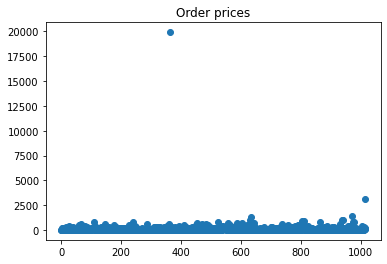

In [32]:
x_values = pd.Series(range(0, len(orders_new['revenue'])))
plt.scatter(x_values, orders_new['revenue'])
plt.title('Order prices');

#### Calculating the 95th and 99th percentiles for the number of orders per user.

In [33]:
print(np.percentile(orders['revenue'], [95, 99])) 

[435.54  900.904]


The scatter chart shows us that there are outliers in the size of perchases. No more than 5% of users buy more than for 435.54, no more than 1% buys more than 900. But we see some orders with the price of 20 000 and 2500.

### The statistical significance of the difference in conversion between the groups using the raw data. 

In [34]:
ordersByUsersA = orders_new[orders_new['group']=='A'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders_new[orders_new['group']=='B'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders'] 

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.01102
0.160


The p_value is lower than 0.05, the raw data analysis shows that the groups conversion rates have statistically significant differences. The relative conversion gain for group B compared with group A is 16%

### The statistical significance of the difference in average order size between the groups using the raw data. 

In [35]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders_new[orders_new['group']=='A']['revenue'], orders_new[orders_new['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.862
0.252


The p_value is higher than 0.05, the raw data analysis shows that the groups average revenue don't have statistically significant differences. The relative difference between 2 groups is only 2,5%

Now let's remove anomalies from our orders data.
We'll consider anomalous users those who made three or more orders or placed one for more than 800, because only 1-5% made the orders more expensive than 600 and only 1% made 4 or more orders per user.

In [36]:
ordersByUsersA = (
    orders_new[orders_new['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders_new[orders_new['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 600]['visitorid']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))

1099    148427295
33      249864742
684     358944393
648     382846391
58      611059232
dtype: int64


Now as we have the abnormal quantity and order prices , it is easy to remove the anomalies and filter the data.

In [37]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

In [38]:
alpha = .05 

results = stats.shapiro(sampleAFiltered)
p_value = results[1] 

print('p-value: ', p_value)

if (p_value < alpha):
    print("Null hypothesis rejected: the distribution is not normal")
else:
    print("Failed to reject the null hypothesis: the distribution seems to be normal") 


p-value:  0.0
Null hypothesis rejected: the distribution is not normal


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [39]:
alpha = .05 

results = stats.shapiro(sampleBFiltered)
p_value = results[1] 

print('p-value: ', p_value)

if (p_value < alpha):
    print("Null hypothesis rejected: the distribution is not normal")
else:
    print("Failed to reject the null hypothesis: the distribution seems to be normal") 

p-value:  0.0
Null hypothesis rejected: the distribution is not normal


Let's found out if there is a signicance difference in the conversion rates between 2 groups and in the revenue between 2 tested groups. 
Hypothesis
H(0):  There is not a significant difference between the metrics
H(1): There is no reason to consider the metrics are the same

In [40]:
alpha=0.05
p_value = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]
if (p_value < alpha):
    print("Rejecting the null hypothesis: there is a significant difference between the proportions")
else:
    print("Failed to reject the null hypothesis: there is no reason to consider the proportions different") 


Rejecting the null hypothesis: there is a significant difference between the proportions


In [41]:
print("{0:.5f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.00486
0.203


Again we've reached the significance level of the difference in conversion between the groups in the filtered data, as p_value is less that 0.05. The conversion rate in the group B has a better level than in the group A 

In [42]:
print('{0:.3f}'.format(stats.mannwhitneyu(
    orders_new[np.logical_and(
        orders_new['group']=='A',
        np.logical_not(orders_new['visitorid'].isin(abnormalUsers)))]['revenue'],
    orders_new[np.logical_and(
        orders_new['group']=='B',
        np.logical_not(orders_new['visitorid'].isin(abnormalUsers)))]['revenue'])[1]))

print('{0:.3f}'.format(
    orders_new[np.logical_and(orders_new['group']=='B',np.logical_not(orders_new['visitorid'].isin(abnormalUsers)))]['revenue'].mean()/
    orders_new[np.logical_and(
        orders_new['group']=='A',
        np.logical_not(orders_new['visitorid'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.941
0.042


The p_value is higher than 0.05, the filtered data analysis points that the groups average revenue don't have statistically significant differences. The relative difference between 2 groups is only 0,4%

I used that test because the sample size is not big, it is also used to compare differences between two independent groups when the dependent variable is not normally distributed, I made the additional test to understand the distribution and the distribution is not normal.

# A / B test CONCLUSIONS

> # Analyzing the results of A/b testing in **online store**
>
> - Went through 3 datasets (visits, orders and  hypotheses). Changed data types in the dates data to appropriate view. Deleted the users  who suddenly fell into 2 groups
> - We observe that there are some outliers in raw data, concerning the purchase size and the number of purchases per users.  There's a statistically significant difference in conversion between the groups, according to both the raw and the filtered data.
The raw data didn't show a statistically significant difference between the groups in terms of average purchase size. After the anomalies were removed, it turned out there wasn't a statistically significant difference too.
> - The graph of the difference in **conversion** between the groups shows that group B's results are better than those of group A: they have a tendency to grow or have stabilized around the mean.The graph of the difference in average purchase size shows fluctuations: it was this graph that allowedus to detect anomalies. 
>  Overall **B group** shows  **the better** results in the A/B test.

**My decision according to the analysis of test results: 1. Stop the test, consider B as the leader, because there conversion at that group is better, there is a bigger share of users that buy and not just visiting the site and this metrics reached the statistical significant level** 